In [70]:
#Import required packages
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from time import time
import pandas as pd
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
import pickle

Question 1

Question 2

As mentioned in the wiki article on uncertainty quantification: "in regression analysis and least squares problems, the standard error of parameter estimates is readily available, which can be expanded into a confidence interval." This calculation is straightforward, and will not be shown here.

Quesition 3

In [45]:
lewitts = pd.read_csv("Lewitt.csv", encoding="latin-1")
lewitts.auction_date = pd.to_datetime(lewitts.auction_date,infer_datetime_format=True)#convert to datetime

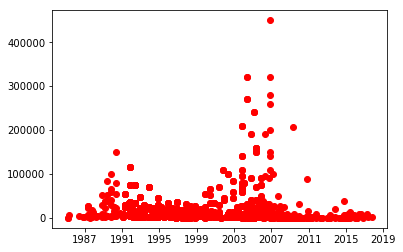

In [48]:
plt.plot(list(lewitts.auction_date), list(lewitts.hammer_price),'ro')
plt.show()

Above graph shows that some Lewitt works took on very inflated prices in the run up to 2008 while others remained depressed. My hypothesis is that this data is comprised of a large mix of originals and prints, accounting for the size of the dataset and the price disparity. After 2008, prices began to rise again in 2014. 

Question 4

I think images of the works could improve the model. Perhaps light colored works sell better than dark colored works, etc. These features could be ascertained using a convolutional neural network.

Question 5

To begin, I would make a correlation plot between hammer price and size(which is a function of height, width, and depth). Additionally, I would look at the value of the coeffecients for height width, and depth. Lastly, my initial consideration would include a plot similar to the above plot, to see if a relationship is visible. 

Question 6

I would look at the correlation between different artists or groups of artists (impressionists, American modern, etc) as well as the correlation between different types of works (painting, sculpture, etc). This effort could be extended across numerous different features using a correlation graph.

In [66]:
#import coefficients
def loadCoef():
    coef = pd.read_csv("coef1.csv")
    coef = coef.as_matrix()
    coef = np.delete(coef, np.s_[0], axis =1)
    return coef

[[ -1.81973781e+03]
 [  4.13323137e+02]
 [  7.31658905e+02]
 [  1.28567950e+03]
 [ -2.33253767e+03]
 [  9.49404604e+03]
 [  4.50294373e+03]
 [  2.40173107e+05]
 [  9.08903543e+04]
 [ -7.11538244e+04]
 [ -7.33949079e+04]
 [  6.37373611e+04]
 [ -9.85728727e+04]
 [ -5.54455492e+04]
 [ -3.05631032e+03]
 [  3.56287417e+04]
 [  8.49192958e+04]
 [  6.50970179e+03]
 [ -3.50194720e+03]
 [ -1.20726908e+05]
 [ -1.25621409e+05]
 [  2.42068021e+05]
 [  4.99513313e+04]
 [ -2.04954466e+05]
 [ -9.84315887e+04]
 [  1.06480638e+05]
 [  1.53811701e+05]
 [  3.21505629e+04]
 [ -2.62029159e+04]
 [  2.11152842e+05]
 [ -9.09262238e+04]
 [ -1.10982651e+04]
 [ -1.66193053e+05]
 [  1.81261529e+04]
 [  3.71880034e+04]
 [ -5.20750141e+04]
 [  1.05467911e+04]
 [ -1.13301712e+05]
 [ -2.01835209e+04]
 [ -3.37383624e+03]
 [ -6.30871422e+04]
 [ -2.48637111e+05]
 [  1.85122678e+04]
 [  2.56373102e+04]
 [  1.26387034e+05]
 [ -1.40389405e+05]
 [  1.43749137e+05]
 [ -1.98777251e+05]
 [  6.51353214e+03]
 [ -6.53334841e+04]


In [73]:
def initilializeData():
    dfInit = pd.read_csv("data.csv", encoding = "latin-1")
    yInit = dfInit.hammer_price
    dfInit.auction_date = pd.to_datetime(dfInit.auction_date,infer_datetime_format=True)#convert to datetime
    print(list(dfInit))
    dfInit = dfInit.as_matrix()
    dfInit = pd.DataFrame(dfInit)
    dfInit = pd.get_dummies(dfInit, columns=[2,3,5,6,7,10,11,16])
    return (dfInit, yInit)



['artist_birth_year', 'artist_death_year', 'artist_name', 'artist_nationality', 'auction_date', 'category', 'currency', 'edition', 'estimate_high', 'estimate_low', 'hammer_price', 'location', 'materials', 'measurement_depth_cm', 'measurement_height_cm', 'measurement_width_cm', 'title', 'year_of_execution']
<bound method NDFrame.head of            0     1                    4       8       9  \
0       1902  1982  1987-11-18 01:00:00     NaN     NaN   
1       1902  1982  2005-06-12 00:00:00     NaN     NaN   
2       1902  1982  1994-05-17 00:00:00     NaN     NaN   
3       1902  1982  1987-05-19 00:00:00     NaN     NaN   
4       1902  1982  2002-09-19 04:00:00    2500    1500   
5       1902  1982  2009-06-02 22:00:00     400     300   
6       1902  1982  2015-03-26 00:00:00     NaN     NaN   
7       1902  1982  2006-11-20 01:00:00   40000   30000   
8       1902  1982  2008-09-14 00:00:00   12000   10000   
9       1902  1982  1990-11-20 01:00:00     NaN     NaN   
10      1902 

In [ ]:
def initializeModel(Init[0], Init[1]):
    data = Init[0]
    y = Init[1]
    clf = linear_model.Ridge(alpha=.5)
    clf.fit(data, y)
    s = pickle.dumps(clf)
    return s

In [ ]:
#Read in data
def read(file):
    df = pd.read_csv(file, encoding="latin-1")
    y = df.hammer_price #seperate target variable
    df.auction_date = pd.to_datetime(df.auction_date,infer_datetime_format=True)#convert to datetime
    #Function to convert artist name into one-hot variable encoding according to dfInit
    return(df, y)

In [ ]:
def rmse(y_hat, y):
    error = math.sqrt(math.pow((y_hat[i]-y[i]),2))
    return error

In [ ]:
def predict(file):
    Init = InitializeData()#Read in the training data to build a model
    model = InitializeModel(Init)#Build a model using the training data
    clf = pickle.loads(model)
    #Begin reading in files to make predictions on
    #This can be easily adapted to take in multiple files
    files = read(file)
    x = files[0]
    y = files[1]
    rmse = []
    y = y.as_matrix()
    for i in range(len(y)):
        Y_hat = clf.predict(x[i])
        rmse.append(rmse(y_hat, y))
    return rmse
        
